In [1]:
import os,shutil
import numpy as np
import torch
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# Not tested. hard code as below
def MovePicToFolder(meta_csv_file, image_col_name, type_col_name, pic_ext_name = 'jpg'):
    meta_data = pd.read_csv(meta_csv_file)
    
    filename_list = meta_data[image_col_name].values.tolist()
    folder_list = meta_data[type_col_name].values.tolist()
    
    #Create Folder if not exist
    df_group = meta_data.groupby(by = type_col_name)
    Cata_list = list(df_group.groups.keys())
    
    for i in range(len(Cata_list)):
    path = os.path.join(data_folder, Cata_list[i])
    if not os.path.exists(path):
        os.mkdir(path)
        
    # Move pictres to corresponding type folders
    # We can also run multi-thread to do such things, but run only one-time, so .....
    # Just like the Pytorch number_workers
    for i in range(len(filename_list)):
        filename = os.path.join(data_folder, filename_list[i] +'.'+ pic_ext_name)
        foldername = os.path.join(data_folder, folder_list[i])
        shutil.move(filename, foldername)
        
# MovePicToFolder('HAM10000_metadata.csv',)

In [23]:
meta_data = pd.read_csv('HAM10000_metadata.csv')

filename_list = meta_data['image_id'].values.tolist()
folder_list = meta_data['dx'].values.tolist()

df_group = meta_data.groupby(by = 'dx')
Cata_list = list(df_group.groups.keys())
Cata_list
data_folder = 'NewData'
for i in range(len(filename_list)):
    filename = os.path.join(data_folder, filename_list[i]+'.jpg')
    foldername = os.path.join(data_folder, folder_list[i])
    shutil.move(filename, foldername)
    

In [3]:
#Validate the folder classfiy correctly
meta_data = pd.read_csv('HAM10000_metadata.csv')
filename_list = meta_data['image_id'].values.tolist()
filetype_list = meta_data['dx'].values.tolist()
dict_type = dict(zip(filename_list, filetype_list))

df_group = meta_data.groupby(by = 'dx')
Cata_list = list(df_group.groups.keys())
data_folder = 'NewData'

total_corret = 0

for i in range(len(Cata_list)):
    SubFoldeNname = os.path.join(data_folder,Cata_list[i])
    print("SubFolder name is {}".format(SubFoldeNname))
    
    for sub_file in os.listdir(SubFoldeNname):
        sub_file = os.path.splitext(sub_file)[0]
        if dict_type[sub_file] == Cata_list[i]:
            total_corret += 1
        else:
            print('%s is not %s, correct type is %s',sub_file, SubFoldeNname, dict_type[sub_file])

print("Total correct number is:",total_corret)

SubFolder name is NewData/akiec
SubFolder name is NewData/bcc
SubFolder name is NewData/bkl
SubFolder name is NewData/df
SubFolder name is NewData/mel
SubFolder name is NewData/nv
SubFolder name is NewData/vasc
Total correct number is: 10015


In [4]:
from enum import Enum
class ModelType(Enum):
    RESNET = 1
    VGG = 2
    OTHER = 3
    
modeltype = ModelType.RESNET
modeltype

<ModelType.RESNET: 1>

In [4]:
## Load and Transform our Data
# Orignal Data download from https://github.com/udacity/dermatologist-ai

#data_dir = 'd:\\Data\\'
#train_dir = os.path.join(data_dir, 'train')
#test_dir = os.path.join(data_dir, 'test')
#valid_dir = os.path.join(data_dir, 'valid')

# classes are folders in each directory with these names
#classes = ['melanoma', 'nevus', 'seborrheic_keratosis']


In [29]:
## Load and Transform our Data
# Orignal Data download from https://github.com/udacity/dermatologist-ai
data_folder = 'NewData'
data_dir = data_folder 

# classes are folders in each directory with these names
classes = Cata_list

valid_size = 0.149
train_size = 0.85
test_size = 0.01

In [25]:
##########################################################################
####################       Deprecated          ###########################
##########################################################################
def CheckFileAccuracy(train_dir,filename = 'metadata.csv'):
    #metadata.csv contains the classfy info
    # We only need to verify 
    meta_data = pd.read_csv('metadata.csv')

    lista = meta_data['name'].values.tolist()
    listb = meta_data['meta.clinical.diagnosis'].values.tolist()

    dict_type = dict(zip(lista, listb))

    melanoma_correct = 0
    nevus_correct = 0
    seb_correct = 0
    
    train_dir_mela = os.path.join(train_dir,'melanoma')
    train_dir_nevus = os.path.join(train_dir,'nevus')
    train_dir_seb = os.path.join(train_dir,'seborrheic_keratosis')

    for file in os.listdir(train_dir_mela):
        file = os.path.splitext(file)[0]
        if dict_type[file] == 'melanoma':
            melanoma_correct += 1
        else:
            print('%s is not melanoma, correct type is %s',file, dict_type[file])

    for file in os.listdir(train_dir_nevus):
        file = os.path.splitext(file)[0]
        if dict_type[file] == 'nevus':
            nevus_correct += 1
        else:
            print('%s is not nevus, correct type is %s',file, dict_type[file])

    for file in os.listdir(train_dir_seb):
        file = os.path.splitext(file)[0]
        if dict_type[file] == 'seborrheic keratosis':
            seb_correct += 1
        else:
            print('%s is not seborrheic_keratosis, correct type is %s',file, dict_type[file])
    
    print('melanoma Accuracy %d / %d' %( melanoma_correct ,len(os.listdir(train_dir_mela))))
    print('nevus Accuracy %d / %d' %(nevus_correct ,len(os.listdir(train_dir_nevus))))
    print('seborrheic keratosis Accuracy %d / %d' %( seb_correct ,len(os.listdir(train_dir_seb))))
    
#CheckFileAccuracy(train_dir)
#CheckFileAccuracy(valid_dir)


In [30]:
#Randowm Resize 
data_transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Resize(256),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(), 
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
        ])

train_data = datasets.ImageFolder(data_folder, transform=data_transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

# Train Split 
train_valid_split = int(np.floor((train_size+valid_size) * num_train)) 
valid_split = int(np.floor( train_size* num_train))

train_valid_idx, test_idx = indices[:train_valid_split], indices[train_valid_split:]
train_idx, valid_idx = indices[ :valid_split], indices[valid_split:train_valid_split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)


In [31]:
batch_size = 128
num_workers= 10
train_data = datasets.ImageFolder(data_dir, transform=data_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)

In [12]:

print(len(train_idx))
print(len(valid_idx))
print(len(test_idx))

print("--------------")
print(train_valid_split)
print(valid_split)

8012
500
1503
--------------
8512
8012


In [12]:
# Deprecated

data_transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Resize(256),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(), 
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
        ])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform) 

# print out some data stats
print('Num training images: ', len(train_data))
print('Num valid images: ', len(valid_data))
print('Num test images: ', len(test_data))

NameError: name 'train_dir' is not defined

In [10]:
def visual_data(data_loader,row_num,col_num):
    dataiter = iter(data_loader)
    images, labels = dataiter.next()
    images = images.numpy() # convert images to numpy for display

    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(row_num*col_num):
        ax = fig.add_subplot(col_num, row_num, idx+1, xticks=[], yticks=[])
        
        plt.imshow(np.transpose(images[idx], (1, 2, 0)))
        ax.set_title(classes[labels[idx]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

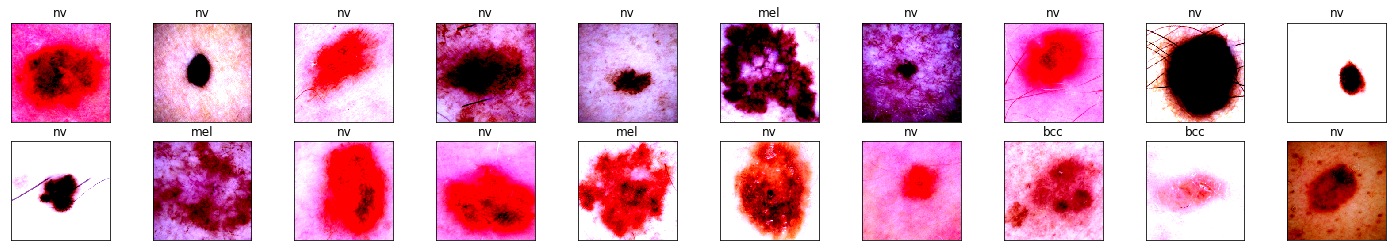

In [11]:
visual_data(train_loader,10,2)

In [32]:
import torch.nn as nn
import torch.nn.functional as F

if modeltype == ModelType.RESNET:
    training_model = models.resnext101_32x8d(pretrained=True)
if modeltype == ModelType.VGG:
    training_model = models.vgg19(pretrained=True)
    
#Freeze the parameters
for param in training_model.parameters():
    param.requires_grad_(False)
    
print(training_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [33]:
full_connected_layers_new = nn.Sequential(nn.Linear(training_model.fc.in_features, 512),
                          #nn.BatchNorm1d(512),
                          nn.ReLU(),
                          nn.Dropout(0.5),
                          nn.Linear(512, 128),
                          #nn.BatchNorm1d(128),
                          nn.ReLU(),
                          nn.Dropout(0.5),            
                          nn.Linear(128, len(classes))) 

training_model.fc= full_connected_layers_new#full_connected_layers

# if GPU is available, move the model to GPU
if train_on_gpu:
    training_model.cuda()

print(training_model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=512, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=128, out_features=7, bias=True)
)


In [12]:
full_connected_layers_vgg= nn.Sequential(nn.Linear(vgg19.classifier[0].in_features, 512),
                          #nn.BatchNorm1d(512),
                          nn.ReLU(),
                          nn.Dropout(0.5),
                          nn.Linear(512, 128),
                          #nn.BatchNorm1d(128),
                          nn.ReLU(),
                          nn.Dropout(0.5),            
                          nn.Linear(128, len(classes))) 

training_model.classifier = full_connected_layers_vgg

if train_on_gpu:
    vgg19.cuda()

print(vgg19.classifier)

In [34]:
import torch.optim as optim
#Learning rate
lr = 0.0001
n_epochs = 20

#class_wight name : akiec, bcc, bkl, df, mel, nv, vasc
class_wight =torch.FloatTensor([1,1,1,1,1,0.5,1])

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss(weight=class_wight.cuda())

# specify optimizer (Adam) and learning rate = 0.0001
optimizer = optim.Adam(training_model.fc.parameters(), lr=lr)

In [35]:
train_loss_list = list()
valid_loss_list = list()

#If train and valid_loss less than np.inf  save the valid_loss
#Or shall we do some linear combination train_loss_min and valid_loss_min? such as α*train_loss_min + β*valid_loss_min

train_loss_min = np.inf

model_dir = 'model\\'
model_name = 'train_model.pt'
save_path = model_dir + model_name

In [36]:
training_model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [37]:
def train_net(train_model,n_epochs, train_loss_list, valid_loss_list,criterion,optimizer ):
    valid_loss_min = np.inf
    train_loss_min = np.inf
    
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        ######################    
        # Training the model #
        ###################### 
        train_model.train()
        train_loss = 0.0
        
        # train on batches of data, assumes you already have train_loader
        for batch_i, (data, target) in enumerate(train_loader):
            
            if train_on_gpu: 
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            
            output = train_model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss = (train_loss * batch_i + loss.data) /  (batch_i + 1)
            train_loss_list.append(train_loss)
            print('Batch_i: {} \tTraining Loss: {:.6f} \t'.format(batch_i, train_loss,))
        ######################    
        # Valid the model #
        ###################### 
        train_model.eval()
        valid_loss = 0
        
        class_correct = list(0. for i in range(len(classes)))
        class_total = list(0. for i in range(len(classes)))
        
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            
            output = train_model(data)
            loss = criterion(output, target)
            
            _, pred = torch.max(output, 1)   
            
            correct_tensor = pred.eq(target.data.view_as(pred))
            correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
            
            for i in range(len(data)):   
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
                
            valid_loss = (valid_loss * batch_i + loss.data) /  (batch_i + 1)
            valid_loss_list.append(valid_loss)
            
            
        for i in range(len(classes)):
            if class_total[i] > 0:
                print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                    classes[i], 100 * class_correct[i] / class_total[i],
                    np.sum(class_correct[i]), np.sum(class_total[i])))
            else:
                print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        print('\n Epoch: %d Test Accuracy (Overall): %2d%% (%2d/%2d)' % (epoch,
            100. * np.sum(class_correct) / np.sum(class_total),
            np.sum(class_correct), np.sum(class_total)))

            
        # print loss statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if train_loss < train_loss_min:
            train_loss_min = train_loss
            torch.save(train_model.state_dict(), save_path )

    print('Finished Training')


In [38]:
#torch.autograd.set_detect_anomaly(True)
n_epochs = 5
#train_net(resnet_50,n_epochs,train_loss_list, valid_loss_list)
train_net(training_model,n_epochs,train_loss_list, valid_loss_list,criterion, optimizer)

Batch_i: 0 	Training Loss: 0.802517 	
Batch_i: 1 	Training Loss: 0.687138 	
Batch_i: 2 	Training Loss: 0.667751 	
Batch_i: 3 	Training Loss: 0.677474 	
Batch_i: 4 	Training Loss: 0.661311 	
Batch_i: 5 	Training Loss: 0.648561 	
Batch_i: 6 	Training Loss: 0.636900 	
Batch_i: 7 	Training Loss: 0.631226 	
Batch_i: 8 	Training Loss: 0.638083 	
Batch_i: 9 	Training Loss: 0.624128 	
Batch_i: 10 	Training Loss: 0.629153 	
Batch_i: 11 	Training Loss: 0.642888 	
Batch_i: 12 	Training Loss: 0.655191 	
Batch_i: 13 	Training Loss: 0.656288 	
Batch_i: 14 	Training Loss: 0.652529 	
Batch_i: 15 	Training Loss: 0.643640 	
Batch_i: 16 	Training Loss: 0.642350 	
Batch_i: 17 	Training Loss: 0.637002 	
Batch_i: 18 	Training Loss: 0.642639 	
Batch_i: 19 	Training Loss: 0.645226 	
Batch_i: 20 	Training Loss: 0.648810 	
Batch_i: 21 	Training Loss: 0.645399 	
Batch_i: 22 	Training Loss: 0.643352 	
Batch_i: 23 	Training Loss: 0.635519 	
Batch_i: 24 	Training Loss: 0.634719 	
Batch_i: 25 	Training Loss: 0.62905

Batch_i: 58 	Training Loss: 0.593464 	
Batch_i: 59 	Training Loss: 0.594584 	
Batch_i: 60 	Training Loss: 0.593268 	
Batch_i: 61 	Training Loss: 0.594238 	
Batch_i: 62 	Training Loss: 0.596029 	
Batch_i: 63 	Training Loss: 0.595220 	
Batch_i: 64 	Training Loss: 0.594395 	
Batch_i: 65 	Training Loss: 0.596144 	
Batch_i: 66 	Training Loss: 0.596991 	
Test Accuracy of akiec: 72% (29/40)
Test Accuracy of   bcc: 74% (58/78)
Test Accuracy of   bkl: 64% (100/155)
Test Accuracy of    df: 33% ( 4/12)
Test Accuracy of   mel: 57% (107/185)
Test Accuracy of    nv: 91% (911/1001)
Test Accuracy of  vasc: 80% (17/21)

 Epoch: 2 Test Accuracy (Overall): 82% (1226/1492)
Epoch: 2 	Training Loss: 0.596991 	Validation Loss: 0.094858
Batch_i: 0 	Training Loss: 0.676148 	
Batch_i: 1 	Training Loss: 0.606240 	
Batch_i: 2 	Training Loss: 0.587900 	
Batch_i: 3 	Training Loss: 0.559703 	
Batch_i: 4 	Training Loss: 0.576216 	
Batch_i: 5 	Training Loss: 0.599163 	
Batch_i: 6 	Training Loss: 0.588472 	
Batch_i: 7 

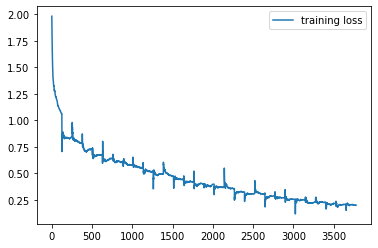

In [53]:
plt.plot(train_loss_list,label = "training loss")
plt.legend()

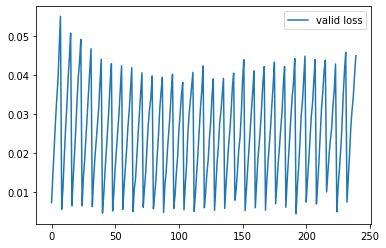

In [54]:
plt.plot(valid_loss_list,label = "valid loss")
plt.legend()

In [37]:
# This is test_code
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    print(data[0].name)
    
    
    break
    

None


In [17]:
aaa = list(1. for i in range(len(classes)))
bbb = list(1. for i in range(len(classes)))

In [23]:
aaa = list(2. for i in range(len(classes)))
aaa

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [35]:
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

for batch_idx,(data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    #output = resnet_50(data)
    output = training_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)   
    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(len(data)):   
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
        
for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

    

Test Loss: 0.123030

Test Accuracy of akiec: 57% (83/144)
Test Accuracy of   bcc: 60% (127/210)
Test Accuracy of   bkl: 51% (224/432)
Test Accuracy of    df: 34% (22/63)
Test Accuracy of   mel: 56% (302/537)
Test Accuracy of    nv: 91% (2812/3075)
Test Accuracy of  vasc: 66% (32/48)

Test Accuracy (Overall): 79% (3602/4509)


In [58]:
class_total

[49.0, 89.0, 167.0, 17.0, 165.0, 999.0, 17.0]